<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Übe einfache Funktionen mit Python</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h2>Viel Erfolg!</h2>   
</div>

In [1]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats        

### Summe mehrerer Würfel [20 Punkte]


### Summe mehrerer Würfel a) - Implementierung [10 Punkte]
Schreiben Sie eine Funktion die mehrere Würfel gleichzeitig wirft und die Summe der Augenzahl zurückgibt.

Die Funktion ```myDiceSum(numSeiten, anzahlWuerfel, anzahlWuerfe)``` soll ```anzahlWuerfel``` mit ```numSeiten``` gleichzeitig werfen, die Summe berechnen und dieses Experiment ```anzahlWuerfe``` oft wiederholen. 

*Beispiel:*

```myDiceSum(6, 2, 5) --> (4, 7, 12, 10, 8)```

In [2]:
import numpy as np

def myDiceSum(numSeiten: int, anzahlWuerfel: int, anzahlWuerfe: int) -> [int]:
    """
    Werfe mehrere Wuerfel mehrmals gleichzeitig und bestimme die Summen
    
    Arguments:
        numSeiten     -- Anzahl der Seiten pro Wuerfel
        anzahlWuerfel -- Anzahl der gleichzeitig geworfenen Wuerfel
        anzahlWuerfe  -- Wie oft die Wuerfel geworfen werden
    Returns:
        summen        -- Liste der Summen der Augenzahlen der Wuerfel
    
    """
    # YOUR CODE HERE
    return [ np.sum(np.random.randint( 1, numSeiten + 1 ,size=anzahlWuerfel)) for x in range(anzahlWuerfe + 1)]

myDiceSum(6, 2, 5)

[7, 6, 2, 5, 9, 8]

### Summe mehrerer Würfel b) - Histogramm [7 Punkte]

Erstellen Sie ein Histogramm für die Summe mehrerer Würfel.

Nehmen Sie dafür zwei Würfel mit je ```6``` Seiten und insgesamt ```1000``` Würfen.

*Hinweis:*

Die Funktion ```plt.hist``` hat den Parameter ```bins``` zum Steuern der Klassen. Stellen Sie sicher, dass für jedes Würfelergebnis genau eine Klasse existiert.

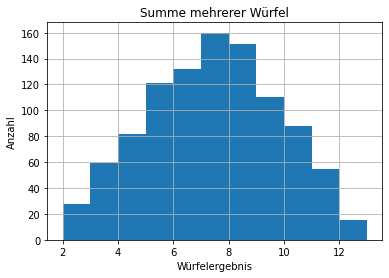

In [3]:
import matplotlib.pyplot as plt


# YOUR CODE HERE
plt.hist(myDiceSum(6, 2, 1000), bins=np.arange(2,14)) 

plt.xlabel('Würfelergebnis')
plt.ylabel('Anzahl')
plt.grid(True)
_ = plt.title("Summe mehrerer Würfel")
# Show plot 
plt.show() 


### Summe mehrerer Würfel c) - Histogramm [7 Punkte]

Wiederholen Sie das Experiment aus b) mit zehn Würfeln mit je ```4``` Seiten und insgesamt ```10000``` Würfen.

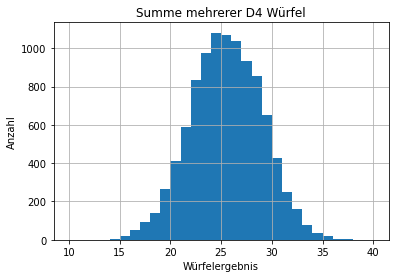

In [4]:
import matplotlib.pyplot as plt


# YOUR CODE HERE
d = myDiceSum(4, 10, 10000)
plt.hist(d, bins=np.arange(10,41) )
plt.xlabel('Würfelergebnis')
plt.ylabel('Anzahl')
plt.grid(True)
_ = plt.title("Summe mehrerer D4 Würfel")
# Show plot 
plt.show() 


### Summe mehrerer Würfel d) - Verteilung [6 Punkte]

Je mehr Würfe und Würfel genutzt werden, desto mehr nähert sich die Verteilung einer bekannten Verteilung an. Welche ist dies?

Bitte speichern Sie Ihre Antwort als String in der Variable ```verteilung``` (bspw. ```verteilung = 'Poissonverteilung'```) .

In [5]:
verteilung = 'Normalverteilung'
# YOUR CODE HERE


### Unfairer Würfel [20 Punkte]

Gegeben Sei ein unfairer Würfel mit sechs Seiten bei dem die Wahrscheinlichkeit eine gerade Zahl zu würfeln doppelt so hoch ist, wie eine ungerade Zahl zu würfeln. Alle geraden Zahlen sind gleichwahrscheinlich. Alle ungeraden Zahlen sind gleichwahrscheinlich und die Summe aller Wahrscheinlichkeiten ist 1.

Lies $P(X=1)$ als: die Wahrscheinlichkeit eine "1" zu würfeln und $P(X<4)$ als die Wahrscheinlichkeit eine Zahl kleiner 4 zu würfeln. 

### Unfairer Würfel a) - Wahrscheinlichkeiten [10 Punkte]

Geben Sie folgende Wahrscheinlichkeiten an:

$P(X = 1), P(X = 2), P(X = 3), P(X = 4), P(X = 5), P(X = 6)$, sowie $P(X < 4)$

Nutzen Sie zur Eingabe die Variablen in der nächsten Zelle

In [6]:
# g = 2 x u
# g + u = 1
# 2 X u + u = 1
# 3u = 1
# u = 1/3

#g = 2 x 1/3 <=> 2/3

#g = 2/3 = sum(2,4,6)    (alle identische Chance)  | / 3

#2/9 chance jeweils 2,4,6

#u = 1/3 = sum(1,3,5) 

#1/9 chance jeweils 1,3,5


# YOUR CODE HERE
P_gleich_1 = 1/9
P_gleich_2 = 2/9
P_gleich_3 = 1/9
P_gleich_4 = 2/9
P_gleich_5 = 1/9
P_gleich_6 = 2/9
P_kleiner_4 = 4/9


### Unfairer Würfel b) - Implementierung [10 Punkte]

Erstellen Sie ein Modell für einen einzelnen Wurf dieses Würfels. 

Vervollständigen Sie die Funktion ```myUnfairDice()```, welche **genau einen** Wurf dieses Würfels simuliert und die Augenzahl zurückgibt.

*Beispiel:*

```myUnfairDice() --> 4```

```myUnfairDice() --> 1```

```myUnfairDice() --> 2```

```myUnfairDice() --> 6```

In [13]:
import numpy as np

def myUnfairDice() -> int:
    """
    Werfe den oben beschriebenen Wuerfel einmal
    
    Returns:
        augenzahl -- Die gewuerfelte Augenzahl
    """
    #d = [*range(1,7)]
    # YOUR CODE HERE
    #probs = d + [x for x in d if x % 2 == 0]

    r = np.random.choice( range(1,7), 1, p=[P_gleich_1, P_gleich_2, P_gleich_3, P_gleich_4, P_gleich_5, P_gleich_6])
    return r[0]
myUnfairDice()


6

## Münzwurf [35 Punkte]

Münzen eignen sich um eine faire Entscheidung zu treffen. Dazu wählt eine Person Kopf und die andere Zahl. Jedes der beiden Ereignisse ist gleich wahrscheinlich.

Anstatt nur einen Münzwurf zu betrachten kann man auch eine Folge von Münzwürfen betrachten. Ein Freund schlägt Ihnen folgendes Spiel vor:

Jeder der zwei Spieler wählt das Ergebnis zwei aufeinander folgender Münzwürfe. Beispielsweise wählt der erste Spieler die Folge Kopf-Kopf ($KK$), der zweite Spieler die Folge Zahl-Zahl ($ZZ$).

Nun wird eine Münze solange geworfen bis eines der beiden Ereignisse auftritt.
Beispielweise kann sich die Folge $ZKZKZKZZ$ ergeben, bei der Spieler 2 gewinnt (da die letzten beiden Würfe Zahl-Zahl sind).

### Münzwurf a) [15 Punkte]

Um ein Gefühl für die Wahrscheinlichkeiten zu bekommen, bietet es sich an ein Spiel zu simulieren.

Schreiben Sie hierzu eine Funktion ```muenzSpiel(folge1, folge2)``` welche genau ein Spiel simuliert und den Gewinner zurückgibt (entweder den String 'Spieler 1' falls ```folge1``` zuerst auftritt oder den String 'Spieler 2' falls ```folge2``` zuerst auftritt).

Benutzen Sie in Ihrer Funktion die Funktion ```muenze()``` die das Ergebnis genau eines zufälligen Münzwurfs zurückgibt.

*Beispiel:*

```muenzSpiel('KK', 'ZZ') --> 'Spieler 1'```

```muenzSpiel('KK', 'ZZ') --> 'Spieler 2'```

...

In [8]:
import numpy as np

def muenze() -> str:
    """
    Werfe eine Muenze einmal
    
    Returns:
        seite -- Seite die oben liegt (entweder Z oder K)
    """
    seiten = ['K', 'Z']
    return seiten[np.random.randint(0, 2)]

def muenzSpiel(folge1: str, folge2: str) -> str:
    """
    Werfe eine Muenze solange, bis eine der beiden Eingabefolgen auftritt
    
    Arguments:
        folge1   -- Folge fuer Spieler 1
        folge2   -- Folge fuer Spieler 2
    Returns:
        gewinner -- Wessen Folge zuerst auftritt 
    """
    # YOUR CODE HERE
    f = ''
    while(True):
        f = f + muenze()
        if f.find(folge1)  != -1 : return 'Spieler 1'
        if f.find(folge2)  != -1 : return 'Spieler 2'


muenzSpiel('KK', 'ZZ')


'Spieler 2'

In [9]:
# Dies ist eine Testzelle, bitte ignorieren Sie diese!

### Münzwurf b) [5 Punkte]

Benutzen Sie Ihre Funktion aus Teil a) um ```1000``` Spiele zu simulieren. Füllen Sie dafür eine Liste mit den Ergebnissen der Funktion ```muenzSpiel('KK', 'ZZ')```.

Erzeugen Sie ein Histogramm für die Ergebnisse der ```1000``` Spiele.

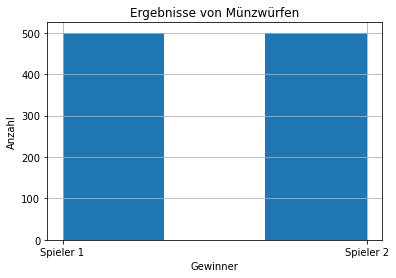

In [10]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
d = []
for x in range(1000):
    d.append(muenzSpiel('KK', 'ZZ'))
plt.hist(np.sort(d), bins=3) 
plt.xlabel('Gewinner')
plt.ylabel('Anzahl')
plt.grid(True)
_ = plt.title("Ergebnisse von Münzwürfen")
plt.show() 

### Münzwurf c) [15 Punkte]

Nehmen Sie an Sie wissen, dass der andere Spieler immer die Folge KK wählt. 

Welche Folge sollten Sie wählen um Ihre Gewinnchance zu maximieren? Wie hoch ist die Wahrscheinlichkeit zu gewinnen?

Speichern Sie die Folge als String in der Variablen ```Folge```. Speichern Sie die Wahrscheinlichkeit in der Variablen ```Gewinnwahrscheinlichkeit```.

In [11]:
Folge = 'ZK'
Gewinnwahrscheinlichkeit = 0.75
# YOUR CODE HERE


In [12]:
# Dies ist eine Testzelle, bitte ignorieren Sie diese!